In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pickle
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline


In [115]:
import os
df = pd.read_csv('../Dataset/slider_features.csv').drop('file_name',axis=1)

In [116]:
scaler = StandardScaler()
df_1 = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)


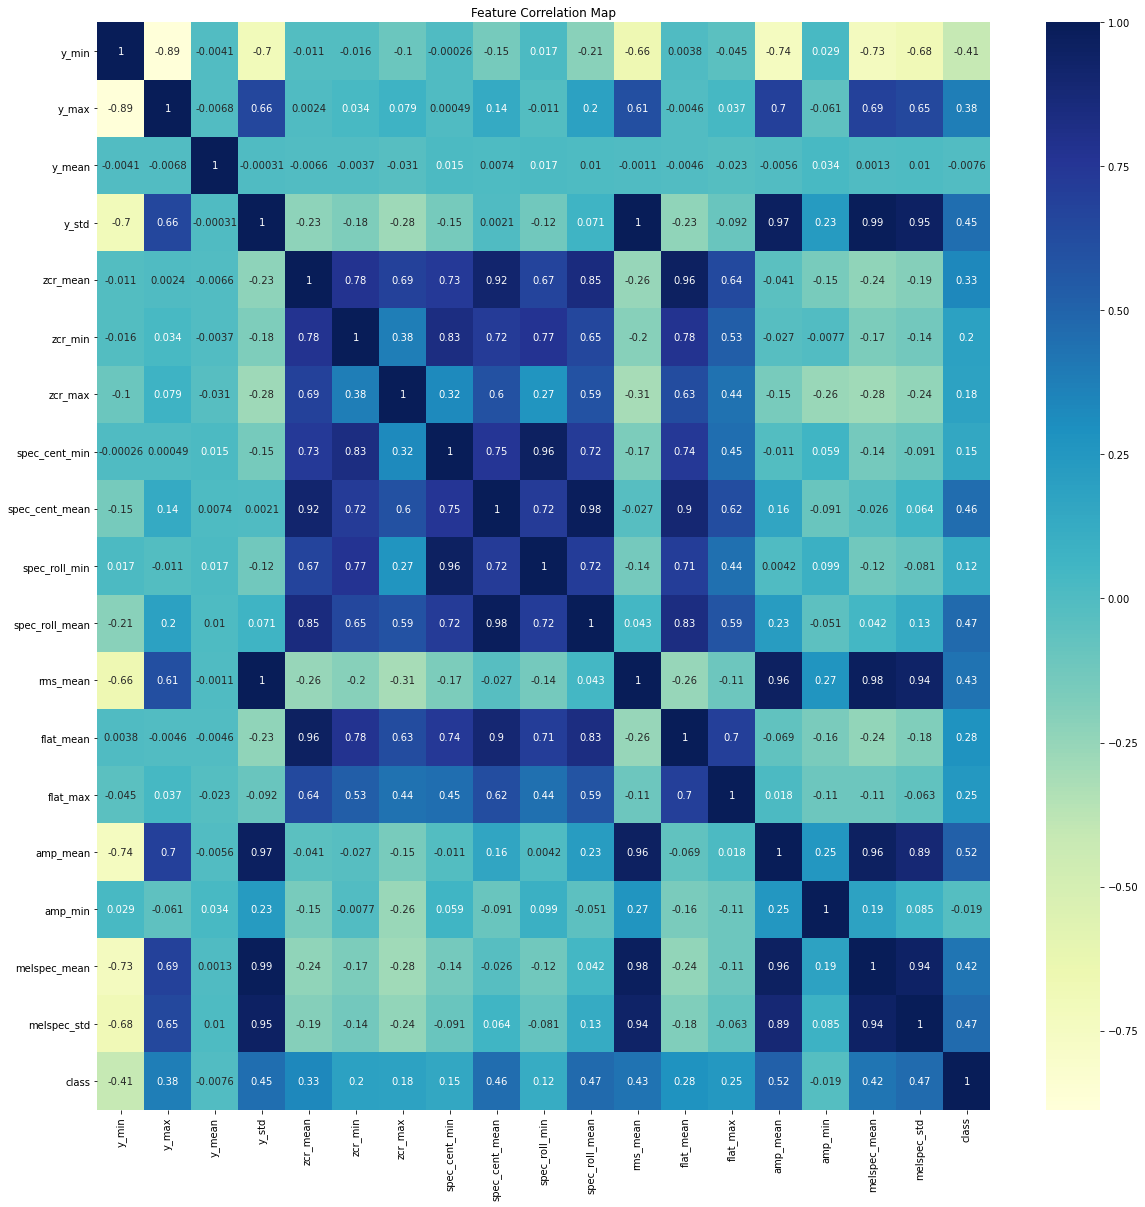

In [117]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_1.corr(),cmap="YlGnBu", annot=True)
plt.title("Feature Correlation Map")

plt.savefig('../img/heatmap.png')

In [126]:
df_1.columns

Index(['y_min', 'y_max', 'y_mean', 'y_std', 'zcr_mean', 'zcr_min', 'zcr_max',
       'spec_cent_min', 'spec_cent_mean', 'spec_roll_min', 'spec_roll_mean',
       'rms_mean', 'flat_mean', 'flat_max', 'amp_mean', 'amp_min',
       'melspec_mean', 'melspec_std', 'class'],
      dtype='object')

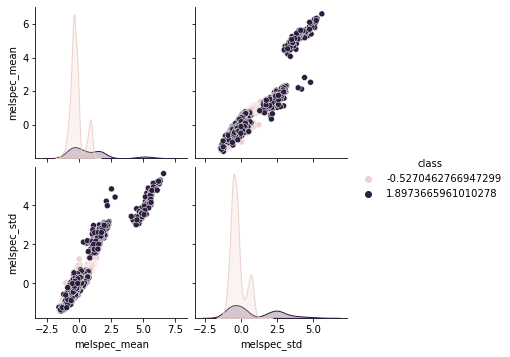

In [129]:

sns.pairplot(df_1.loc[:,[
       'melspec_mean', 'melspec_std', 'class']],hue='class')
plt.savefig('../img/pairplot_melspec_mean_std.png')

In [120]:
X = df_1.loc[:,['y_min','y_max']]


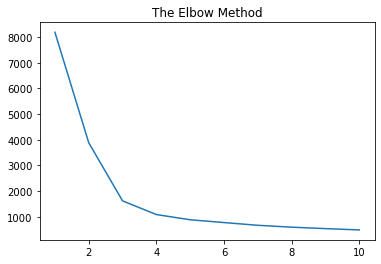

In [131]:
wcss=[]
for i in range(1,11):
    kMeans = KMeans(n_clusters= i, init= 'k-means++',max_iter=300,n_init=10,random_state=0)
    kMeans.fit(X)
    wcss.append(kMeans.inertia_)
plt.plot(range(1,11),wcss)

plt.title('The Elbow Method')
plt.savefig('../img/elbow_method.pdf')


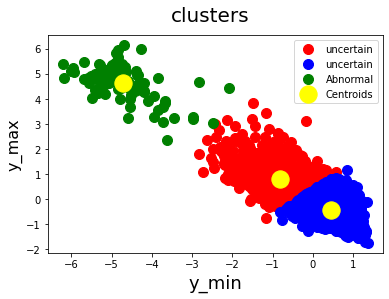

In [130]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
fig = plt.figure()
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100,c='red',label='uncertain')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100,c='blue',label='uncertain')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100,c='green',label='Abnormal')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=300,c='yellow',label='Centroids')


fig.suptitle('clusters', fontsize=20)
plt.xlabel('y_min', fontsize=18)
plt.ylabel('y_max', fontsize=16)
plt.legend()
plt.savefig('../img/normal_abnormal_clusters.pdf')


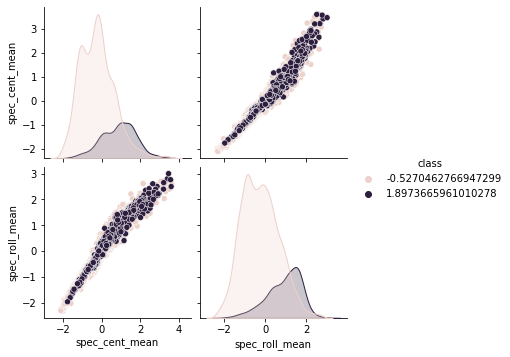

In [124]:

sns.pairplot(df_1.loc[:,['spec_cent_mean','spec_roll_mean','class']],hue='class')
plt.savefig('../img/pairplot_spec_cent_roll_mean.png')